# Manejo de K-means con truco del núcleo

## Enunciado:

- Adjunto tenéis unos datos en dos dimensiones.
- Pero aplicar K-means "a secas", no lo hará, compruébalo. 
- Después aplica el truco del núcleo a ver qué pasa.
- Y después usa DBSCAN y DBPC a ver qué pasa...

Visualización de los datos del csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('csv/synthetic_data4.csv')
df.head()

,X1,X2,Cluster
0,0.682988,-0.345203,1
1,2.040990,-0.131615,1
2,-0.139752,0.454391,1
3,0.885748,0.286342,0
4,1.182459,-0.497711,1


Visualización de los datos para ver su distribución.

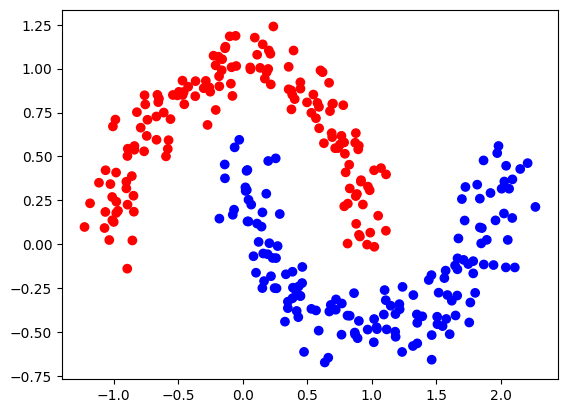

In [2]:
colors = ['r', 'b']
plt.scatter(df['X1'], df['X2'], c=[colors[i] for i in df['Cluster']])
plt.show()

### 1. Aplicación del método K-means sin el truco del núcleo

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
X = df.drop('Cluster', axis=1)
y = df['Cluster']
pred = kmeans.fit_predict(X)

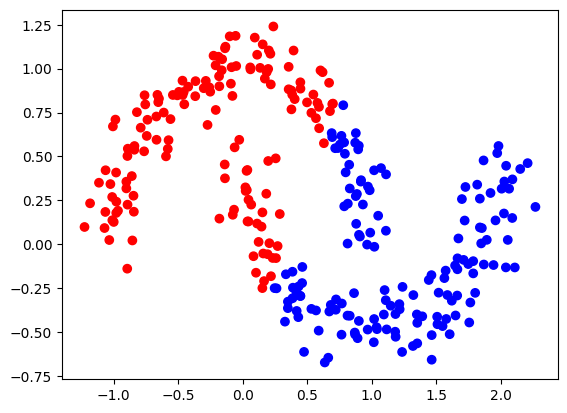

In [4]:
plt.scatter(df['X1'], df['X2'], c=[colors[i] for i in pred])
plt.show()

Cómo se puede observar, el método K-means no es capaz de separar los datos correctamente.

### 2. Aplicación del truco del núcleo

In [5]:
# Calculamos la matriz de Gram usando un núcleo Gaussiano
from sklearn.metrics.pairwise import rbf_kernel
Gram_matrix = rbf_kernel(X, gamma=1)

In [6]:
# Realizamos el clustering utilizando la matriz de Gram
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
pred = kmeans.fit_predict(Gram_matrix)
centroides = kmeans.cluster_centers_

C:\Users\sergi\AppData\Local\Temp\ipykernel_4212\2282860596.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


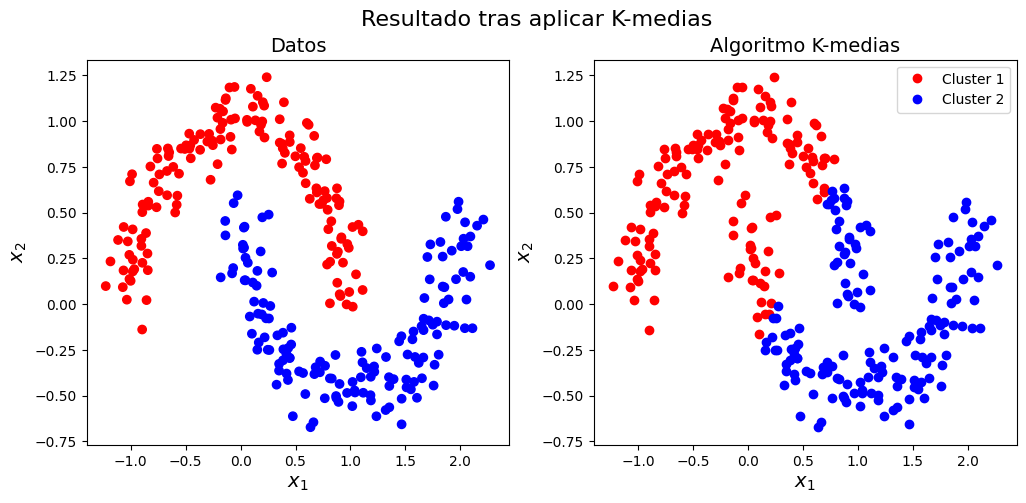

In [7]:
# Representación gráfica de la solución
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle('Resultado tras aplicar K-medias', fontsize=16)

colors = ['r', 'b']
ax1.scatter(X['X1'], X['X2'], c=[colors[i] for i in y])
ax1.set_title("Datos", fontsize=14)
ax1.set_xlabel(r"$x_1$", fontsize=14)
ax1.set_ylabel(r"$x_2$", fontsize=14)

ax2.plot(X[pred==0]['X1'], X[pred==0]['X2'], 'ro', label='Cluster 1')
ax2.plot(X[pred==1]['X1'], X[pred==1]['X2'], 'bo', label='Cluster 2')
ax2.legend()
ax2.set_title("Algoritmo K-medias", fontsize=14)
ax2.set_xlabel(r"$x_1$", fontsize=14)
ax2.set_ylabel(r"$x_2$", fontsize=14)

fig.show()

### 3. Aplicación de DBSCAN

In [8]:
from sklearn.cluster import DBSCAN

minPts = 3
epsilon = 1

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
labels = dbscan.fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Número de clusters: {n_clusters}')

Número de clusters: 1


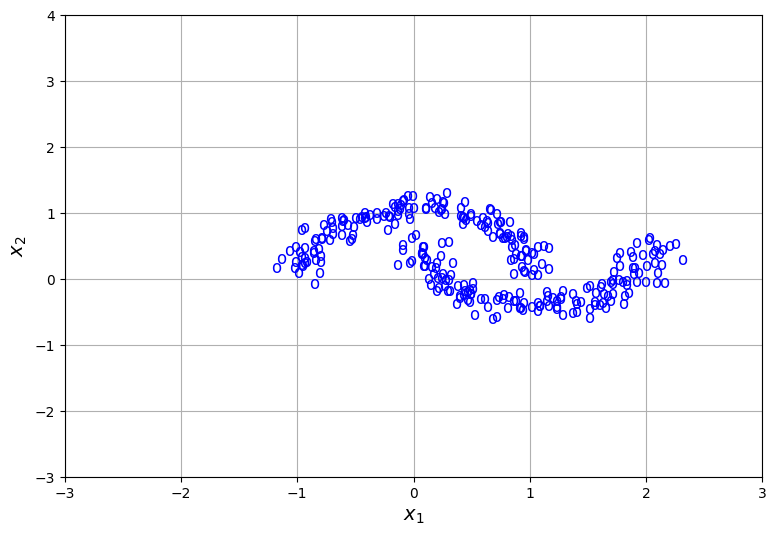

In [9]:
colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(X)):
    plt.text(X.iloc[i, 0], X.iloc[i, 1], color=colors[labels[i]], s='o', fontsize=12)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.grid()
plt.show()

### 4. Aplicación de DBSCAN con DBPC

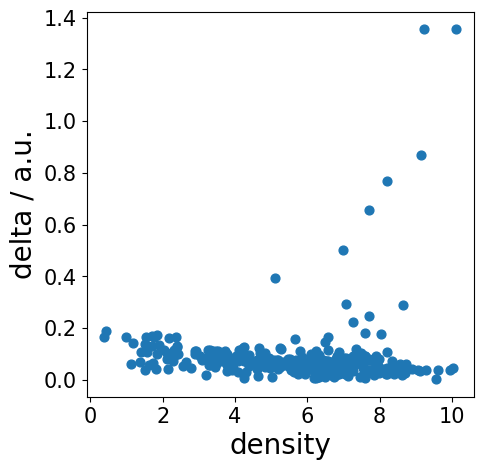

In [10]:
import pydpc
import numpy as np

X_numpy = X.values.copy()
clu = pydpc.Cluster(X_numpy)

In [ ]:
np.bool = bool  # necesario porque np.bool está obsoleto (deprecated)

# Definimos los valores rho y delta que nos permiten elegir los centros
rho = 1
delta = 1.5
clu.assign(rho, delta)

In [ ]:
# Obtenemos que datos de X serán los centros de los clusters
cluster_centers = clu.clusters
cluster_centers

In [ ]:
# Mostramos los grupos obtenidos para cada elemento del dataset X
labels = clu.membership
labels

In [ ]:
# Representación gráfica de la solución
colors = 'bgk'
plt.figure(figsize=(9, 6))
for i in range(len(set(labels))):
      plt.plot(X_numpy[labels == i,0], X_numpy[labels == i,1], colors[i]+"o",label=f"Cluster {i}")
plt.plot(X_numpy[cluster_centers,0],X_numpy[cluster_centers,1],"k*", label="Centroides",markersize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.xlim(-3, 3)
plt.ylim(-3, 4)
plt.legend()
plt.grid()
plt.show()